# DTW-SOM Evaluation - experiment with the synthetic motifs

## 1. Packadge import

In [1]:
import random
import math
import numpy as np
import matplotlib.pyplot as plt
from pyclustering.nnet.som import type_conn
# local code
import os
import sys
sys.path.insert(0, os.path.abspath('../src'))
import dtw_som

## 2. Dataset generation

First we need to set the parameters:

In [2]:
behaviour_dic = {
    "low": (-3, -1.5),
    "middle": (-0.5, 0.5),
    "high": (1.5, 3),
}
n_motifs_per_cluster = 60
behaviour_sizes = list(range(5, 11))

now, we need to define the functions to generate the dataset:

In [3]:
def generate_motifs_from_behaviour_sequence(sequence, n, behaviour_dic, behaviour_sizes):
    motif_list = []
    for i in range(n):
        motif_center = []
        for behaviour in sequence:
            size = random.choice(behaviour_sizes)
            start = behaviour_dic[behaviour][0]
            end = behaviour_dic[behaviour][1]
            sample_values =  list(np.random.uniform(start, end, size))
            motif_center += sample_values
        motif_list.append(motif_center)
    return motif_list

and now we can generate the dataset:

In [4]:
%time
random.seed()
low_middle_high = generate_motifs_from_behaviour_sequence(["low", "middle", "high"], n_motifs_per_cluster, behaviour_dic, behaviour_sizes)
triple_middle = generate_motifs_from_behaviour_sequence(["middle"]*3, n_motifs_per_cluster, behaviour_dic, behaviour_sizes)
high_middle_low = generate_motifs_from_behaviour_sequence(["high", "middle", "low"], n_motifs_per_cluster, behaviour_dic, behaviour_sizes)

motif_dataset = low_middle_high + triple_middle + high_middle_low
random.shuffle(motif_dataset)

len(motif_dataset)

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 4.05 µs


180

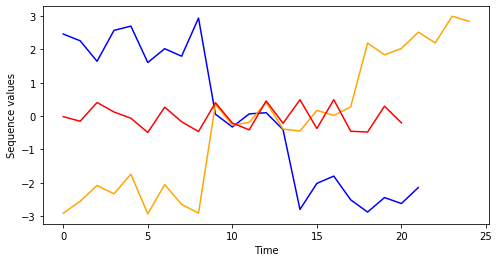

In [10]:
plt.figure(figsize=(8,4))
plt.plot(np.arange(len(motif_dataset[0])), motif_dataset[0], color='blue')
plt.plot(np.arange(len(motif_dataset[3])), motif_dataset[3], color='orange')
plt.plot(np.arange(len(motif_dataset[5])), motif_dataset[5], color='red')
plt.ylabel("Sequence values")
plt.xlabel("Time")
plt.show()

## 3. DTW-SOM training and results

Define the SOM network:

In [16]:
%time
rows = 3
cols = 3
structure = type_conn.grid_four
parameters = dtw_som.DtwSomParameters()
parameters.init_type = dtw_som.DtwTypeInit.anchors
network = dtw_som.DtwSom(rows, cols, structure, parameters=parameters)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 4.05 µs


Train the network:

In [21]:
%%time
anchors = [motif_dataset[0], motif_dataset[5], motif_dataset[3]]
network.train(motif_dataset, 30, anchors=anchors)

Epoch 1 achieved an average quantization error of 1.3492
Epoch 2 achieved an average quantization error of 1.3888
Epoch 3 achieved an average quantization error of 1.3744
Epoch 4 achieved an average quantization error of 1.4318
Epoch 5 achieved an average quantization error of 1.4293
Epoch 6 achieved an average quantization error of 1.4018
Epoch 7 achieved an average quantization error of 1.4294
Epoch 8 achieved an average quantization error of 1.4578
Epoch 9 achieved an average quantization error of 1.4449
Epoch 10 achieved an average quantization error of 1.4008
Epoch 11 achieved an average quantization error of 1.3862
Epoch 12 achieved an average quantization error of 1.3667
Epoch 13 achieved an average quantization error of 1.3775
Epoch 14 achieved an average quantization error of 1.3503
Epoch 15 achieved an average quantization error of 1.3615
Epoch 16 achieved an average quantization error of 1.3703
Epoch 17 achieved an average quantization error of 1.3546
Epoch 18 achieved an av

30

Vizualise DTW-SOM U-matrix:

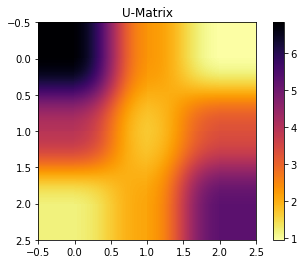

In [22]:
network.show_distance_matrix()

Vizualise the winner matrix:

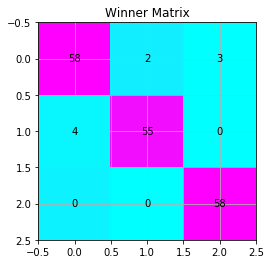

In [23]:
network.show_winner_matrix()

Vizualise the units' sequence values:

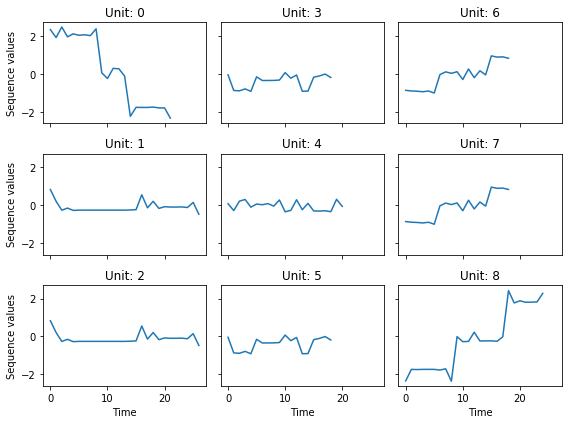

In [28]:
n_neurons = network._size
fig, axs = plt.subplots(3,3,figsize=(8, 6), sharex=True, sharey=True)
for neuron_index in range(n_neurons):
    col = math.floor(neuron_index/3)
    row = neuron_index % 3
    neuron_weights = network._weights[neuron_index]
    axs[row, col].plot(np.arange(len(neuron_weights)), neuron_weights, label=str(neuron_index))
    axs[row, col].set_title("Unit: "+str(neuron_index))
    if col == 0:
        axs[row, col].set_ylabel("Sequence values")
    if row == 2:
        axs[row, col].set_xlabel("Time")
plt.tight_layout()
plt.show()